In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.sans-serif'] = ['SimHei']  # 图中显示中文
#plt.rcParams['font.family'] = 'serif'  
#plt.rcParams['mathtext.fontset'] = 'stix'  # 图中显示中文
plt.rcParams['axes.unicode_minus'] = False  # 图中正常显示负号

def bernstein_basis(i, n, x):
    """
    计算Bernstein基函数
    i: 基函数的索引
    n: 阶数
    x: 自变量值
    """
    return np.math.comb(n, i) * (x**i) * ((1-x)**(n-i))

def f(x):
    """
    目标函数 f(x) = (x^2 + 4x - 2)sin(πx)
    """
    return (x**2 + 4*x - 2) * np.sin(np.pi * x)

def bernstein_polynomial(f, n, x):
    """
    计算n阶Bernstein多项式
    """
    result = 0
    for i in range(n + 1):
        result += f(i/n) * bernstein_basis(i, n, x)
    return result

Text(0, 0.5, 'y')

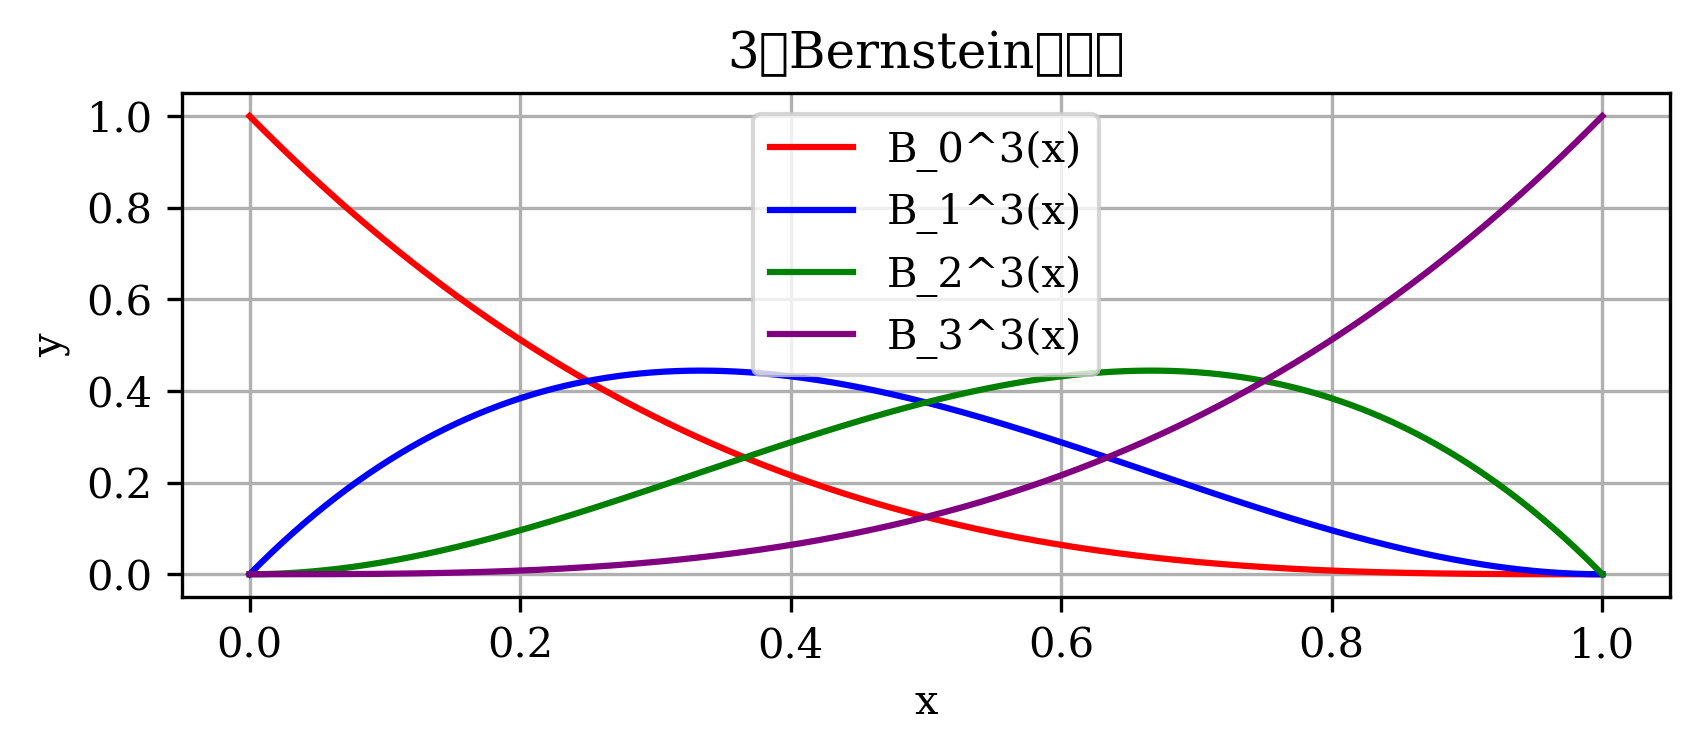

In [20]:

# 创建x值数组
x = np.linspace(0, 1, 1000)

# 创建图形
plt.figure()

# 绘制四个3次Bernstein基函数
plt.subplot(2, 1, 1)
colors = ['red', 'blue', 'green', 'purple']
for i in range(4):
    y = [bernstein_basis(i, 3, xi) for xi in x]
    plt.plot(x, y, label=f'B_{i}^3(x)', color=colors[i])

plt.grid(True)
plt.legend()
plt.title('3次Bernstein基函数')
plt.xlabel('x')
plt.ylabel('y')


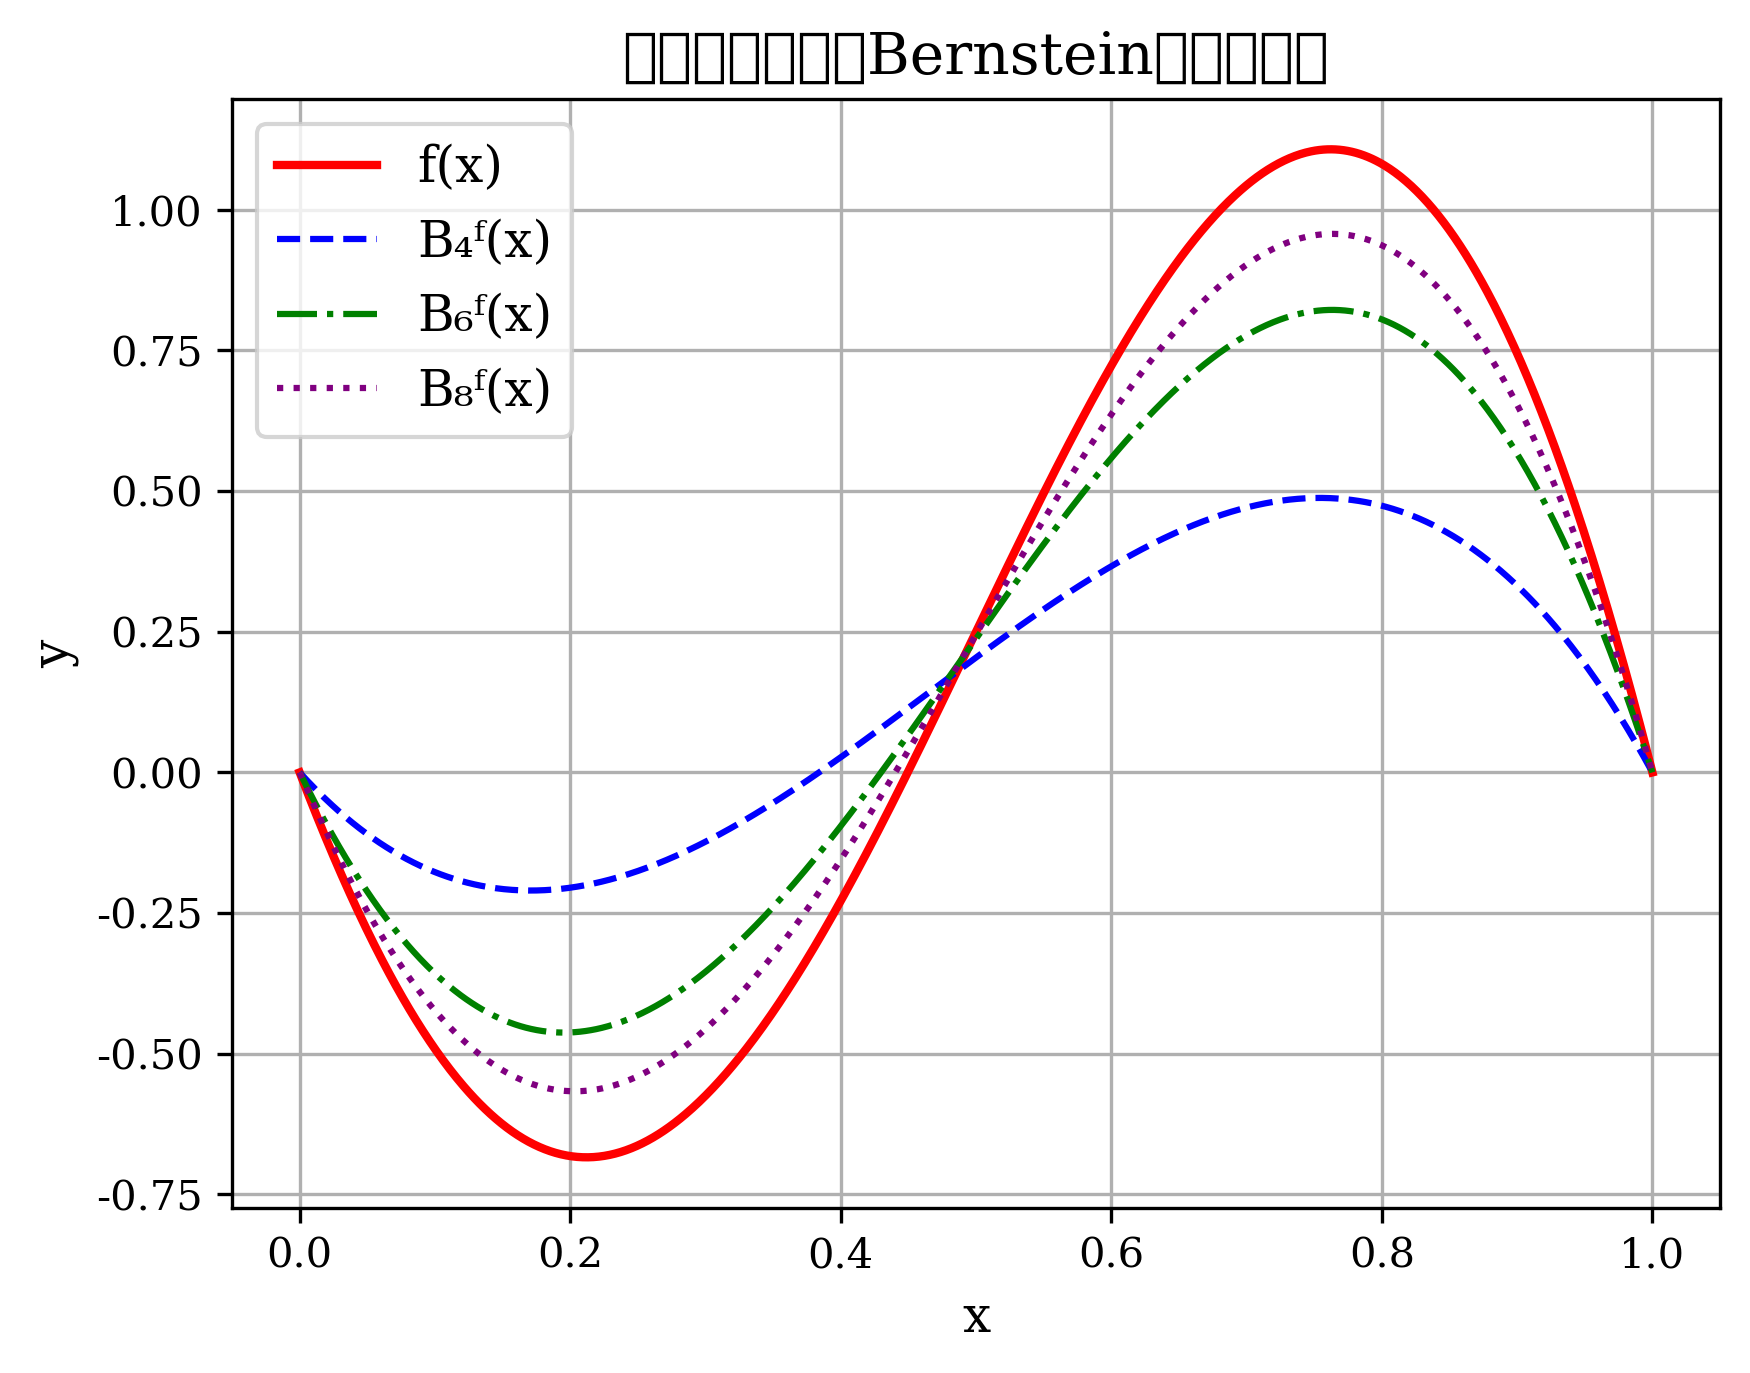

C:\Users\Simons\AppData\Local\Temp\ipykernel_25700\1210759041.py:35: UserWarning: Glyph 35823 (\N{CJK UNIFIED IDEOGRAPH-8BEF}) missing from current font.
  plt.tight_layout()
C:\Users\Simons\AppData\Local\Temp\ipykernel_25700\1210759041.py:35: UserWarning: Glyph 24046 (\N{CJK UNIFIED IDEOGRAPH-5DEE}) missing from current font.
  plt.tight_layout()
C:\Users\Simons\AppData\Local\Temp\ipykernel_25700\1210759041.py:35: UserWarning: Glyph 20989 (\N{CJK UNIFIED IDEOGRAPH-51FD}) missing from current font.
  plt.tight_layout()
C:\Users\Simons\AppData\Local\Temp\ipykernel_25700\1210759041.py:35: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.tight_layout()


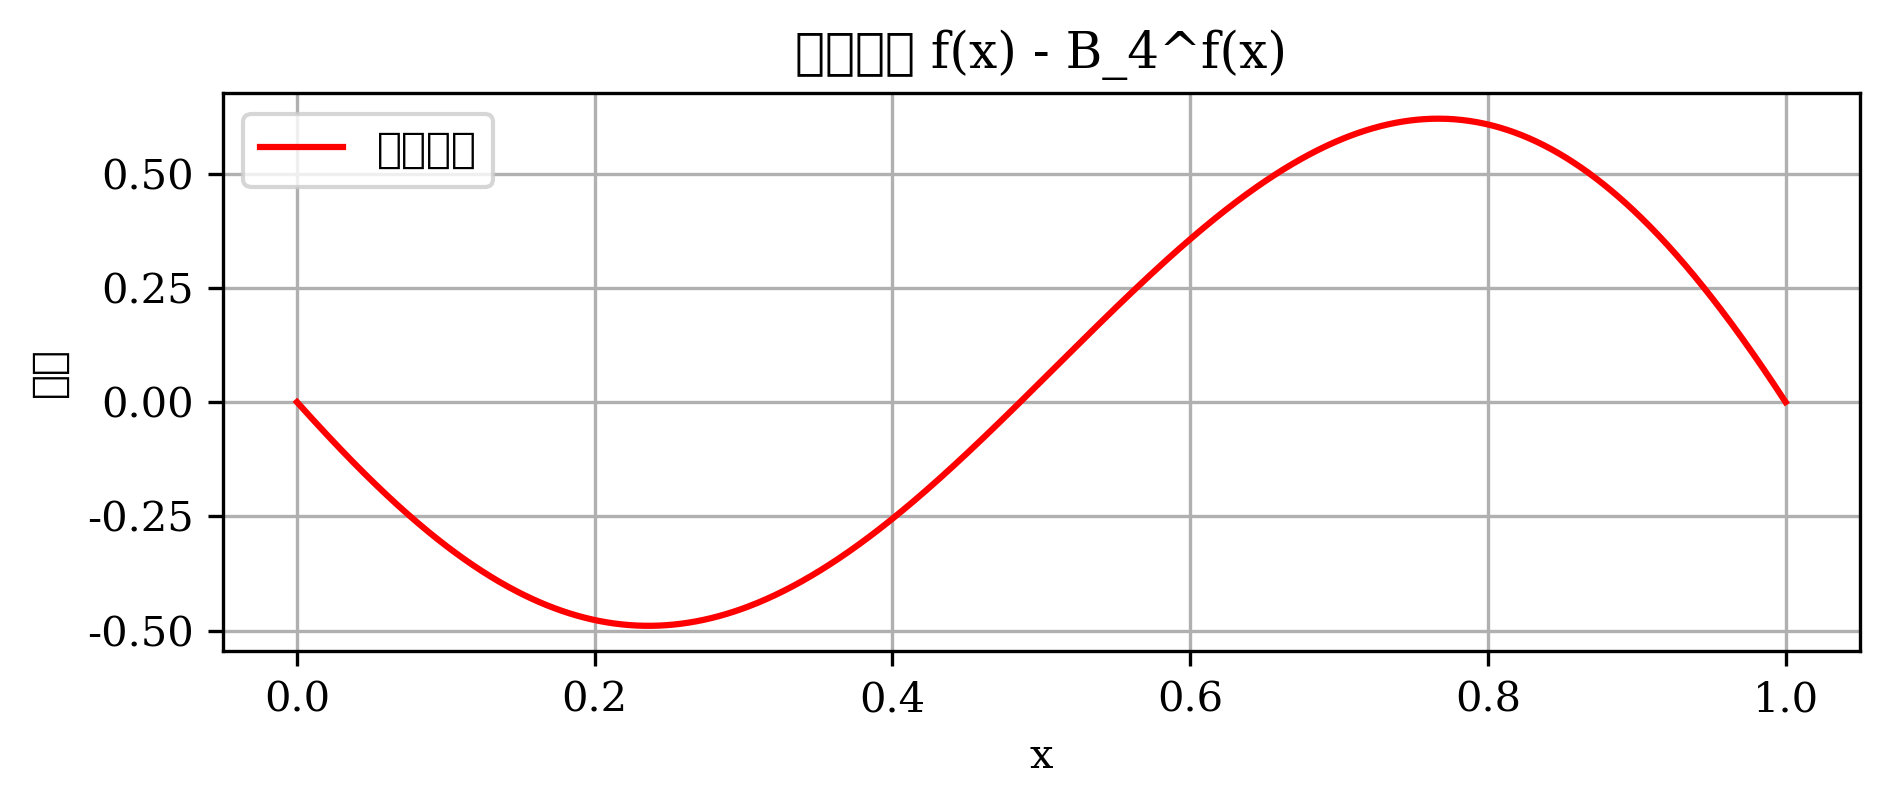

In [21]:

# 计算原函数值和不同阶数的Bernstein多项式值
y_original = [f(xi) for xi in x]
y_b4 = [bernstein_polynomial(f, 4, xi) for xi in x]
y_b10 = [bernstein_polynomial(f, 10, xi) for xi in x]
y_b20 = [bernstein_polynomial(f, 20, xi) for xi in x]

# 绘图
plt.figure()
plt.plot(x, y_original, 'red', label='f(x)', linewidth=2)
plt.plot(x, y_b4, 'blue', label='B₄ᶠ(x)', linestyle='--')
plt.plot(x, y_b10, 'green', label='B₆ᶠ(x)', linestyle='-.')
plt.plot(x, y_b20, 'purple', label='B₈ᶠ(x)', linestyle=':')

plt.grid(True)
plt.legend(fontsize=12)
plt.title('原函数与不同阶Bernstein多项式逼近', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

plt.show()

# 绘制误差函数
plt.subplot(2, 1, 2)
y_true = [f(xi) for xi in x]
y_approx = [bernstein_polynomial(f, 4, xi) for xi in x]
error = [y_t - y_a for y_t, y_a in zip(y_true, y_approx)]
plt.plot(x, error, 'red', label='误差函数')

plt.grid(True)
plt.legend()
plt.title('误差函数 f(x) - B_4^f(x)')
plt.xlabel('x')
plt.ylabel('误差')

plt.tight_layout()
plt.show()